In [1288]:
import numpy as np
import torch
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt 

%matplotlib inline

In [1379]:
def f_lin_reg(x):
    return 3 * x - 4

In [1380]:
def f_Poli_lin_reg(x):
    return 3 * x ** 4 + 3 * x ** 3 - 5 * x **2 + x - 2

## Линейная регрессия

In [1381]:
class LinerRegression:
    def __init__(self, lr = 1e-3):
        self.lr = lr
    def fit(self, X, y, it=1000):
        
        self.W = torch.tensor(np.random.random(X.reshape(-1, 1).shape[1] + 1).reshape(-1, 1), 
                              requires_grad = True)
        X = torch.tensor(np.concatenate((X, np.ones(X.reshape(-1, 1).shape[0]).reshape(-1, 1)), axis=1))
        y = torch.tensor(y)

        for i in range(it):
            loss = torch.mean((y - X@self.W) ** 2)
            loss.backward()
            self.W.data -= self.W.grad.data * self.lr
            self.W.grad.zero_()
        
        return self.W
            
    def predict(self, X):
        X = torch.tensor(np.concatenate((X, np.ones(X.reshape(-1, 1).shape[0]).reshape(-1, 1)), axis=1))
        return (X@self.W).detach().numpy()

In [1382]:
x = np.linspace(-3, 3, 200)
y = f_lin_reg(x) + np.random.random(200) * 4

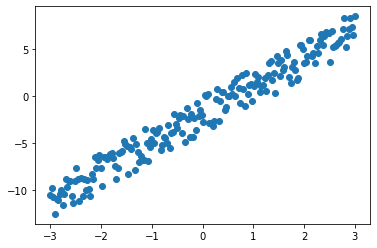

In [1383]:
plt.scatter(x, y)

In [1384]:
model = LinerRegression(lr=1e-2)

In [1385]:
w = model.fit(x.reshape(-1, 1), y.reshape(-1, 1), it=10000)
w

tensor([[ 3.0307],
        [-1.8003]], dtype=torch.float64, requires_grad=True)

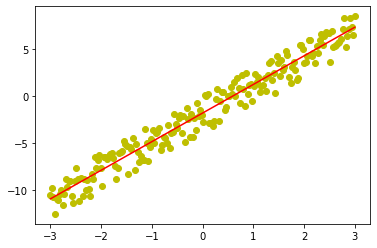

In [1386]:
plt.scatter(x, y, c='y')
plt.plot(x.reshape(-1, 1), model.predict(x.reshape(-1, 1)), c='r')

## полиномиальная регрессия

In [1420]:
class PolinomRegression:
    def __init__(self, lr = 1e-3, pw = 2):
        self.lr = lr
        self.pw = pw
    def fit(self, X, y, it=1000):
        self.W = torch.tensor(np.random.random(X.reshape(-1, 1).shape[1] + self.pw).reshape(-1, 1), 
                              requires_grad = True)
        
        for i in range(1, self.pw):
            X = np.concatenate((X[:, -1].reshape(-1, 1) ** (i + 1), X), axis=1)

        X = torch.tensor(np.concatenate((X, np.ones(X.shape[0]).reshape(-1, 1)), axis=1))
        y = torch.tensor(y)
        
        for i in range(it):
            loss = torch.mean((y - X@self.W) ** 2)
            loss.backward()
            self.W.data -= self.W.grad.data * self.lr
            self.W.grad.zero_()
        
        return self.W
            
    def predict(self, X):
        
        for i in range(1, self.pw):
            X = np.concatenate((X[:, -1].reshape(-1, 1) ** (i + 1), X), axis=1)
        X = torch.tensor(np.concatenate((X, np.ones(X.shape[0]).reshape(-1, 1)), axis=1))        
        
        return (X@self.W).detach().numpy()

In [1388]:
x = np.linspace(-3, 3, 200)
y = f_Poli_lin_reg(x) + np.random.random(200) * 10

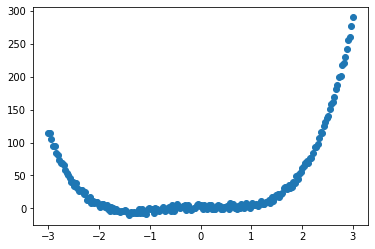

In [1389]:
plt.scatter(x, y)

In [1390]:
model2 = PolinomRegression(pw=4)

In [1391]:
w = model2.fit(x.reshape(-1, 1), y.reshape(-1, 1), it=10000)
w

tensor([[ 2.9662],
        [ 3.0801],
        [-4.7125],
        [ 0.6498],
        [ 2.5955]], dtype=torch.float64, requires_grad=True)

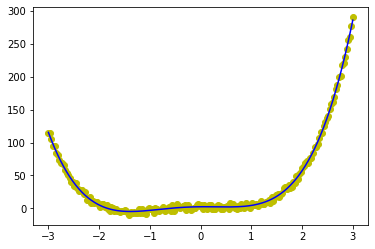

In [1392]:
plt.scatter(x, y, c='y')
plt.plot(x.reshape(-1, 1), model2.predict(x.reshape(-1, 1)), c='b')

## Логистическая регрессия

In [1393]:
class LogRegression:
    def __init__(self, lr = 1e-3):
        self.lr = lr
        
    def sigmoid(self, x):
        return 1 / (1 + 2.7 ** -x)
    
    def fit(self, X, y, it=1000):
        a = []
        
        self.W = torch.tensor(np.random.random(X.reshape(-1, X.shape[1]).shape[1] + 1).reshape(-1, 1), 
                              requires_grad = True)
        X = torch.tensor(np.concatenate((X, np.ones(X.reshape(-1, X.shape[1]).shape[0]).reshape(-1, 1)), axis=1))
        y = torch.tensor(y)

        for i in range(it):
            for (x, lb) in zip(X, y):
                loss = torch.log(1 + torch.exp(-lb * x@self.W))
                loss.backward()
                self.W.data -= self.W.grad.data * self.lr
                q = self.W.grad.data
                a.append(q.numpy().tolist())
                self.W.grad.zero_()
                
                
        return self.W, a
            
    def predict(self, X):
        with torch.no_grad():
            X = torch.tensor(np.concatenate((X, np.ones(X.reshape(-1, X.shape[1]).shape[0]).reshape(-1, 1)), axis=1))
            self.pred_proba = self.sigmoid(X@self.W).detach().numpy()
            
            return np.where(self.pred_proba > 0.5, 1, -1)
    def predict_proba(self):
        return self.pred_proba

In [1394]:
x1 = np.linspace(-2, 2, 20)
x2 = np.linspace(2, 6, 20)

X1 = np.concatenate((x1, x2))

y1 = [-1] * 20
y2 = [1] * 20

Y1 = np.concatenate((y1, y2))
data = pd.DataFrame({'x' : X1, 'y': Y1})
data = data.sample(frac=1)

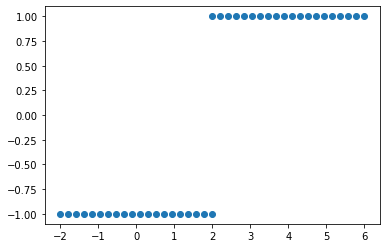

In [1395]:
plt.scatter(data.x, data.y)

In [1396]:
model3 = LogRegression()

In [1397]:
a, b = model3.fit(np.array(data.x).reshape(-1, 1), np.array(data.y).reshape(-1, 1), it=1000)

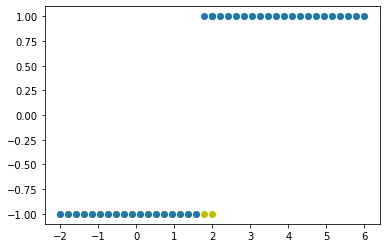

In [1398]:
plt.scatter(np.array(data.x).reshape(-1, 1), np.array(data.y).reshape(-1, 1), c='y')
plt.scatter(np.array(data.x).reshape(-1, 1), model3.predict(np.array(data.x).reshape(-1, 1)))
#plt.scatter(np.array(data.x).reshape(-1, 1), model4.predict(np.array(data.x).reshape(-1, 1)), c='r')

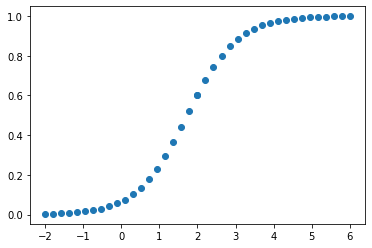

In [1399]:
plt.scatter(np.array(data.x).reshape(-1, 1), model3.predict_proba())

## Полиномиальная логистическая регрессия

In [1400]:
class PoliLogRegression:
    def __init__(self, lr=1e-3, pw=1):
        self.lr = lr
        self.pw = pw
        
    def sigmoid(self, x):
        return 1 / (1 + 2.7 ** -x)
    
    def fit(self, X, y, it=1000):
        a = []

        self.W = torch.tensor(np.random.random(X.reshape(-1, 1).shape[1] + self.pw).reshape(-1, 1), 
                              requires_grad = True)
        
    
        for i in range(1, self.pw):
            X = np.concatenate((X[:, -1].reshape(-1, 1) ** (i + 1), X), axis=1)

        X = torch.tensor(np.concatenate((X, np.ones(X.reshape(-1, X.shape[1]).shape[0]).reshape(-1, 1)), axis=1))
        y = torch.tensor(y)

        for i in range(it):
            for (x, lb) in zip(X, y):

                loss = torch.log(1 + torch.exp(-lb * x@self.W))
                loss.backward()
                self.W.data -= self.W.grad.data * self.lr
                q = self.W.grad.data
                a.append(q.numpy().tolist())
                self.W.grad.zero_()
                
                
        return self.W, a
            
    def predict(self, X):
        with torch.no_grad():
            for i in range(1, self.pw):
                X = np.concatenate((X[:, -1].reshape(-1, 1) ** (i + 1), X), axis=1)
            X = torch.tensor(np.concatenate((X, np.ones(X.shape[0]).reshape(-1, 1)), axis=1))    
            self.pred_proba = self.sigmoid(X@self.W).detach().numpy()
            
            return np.where(self.pred_proba > 0.5, 1, -1)
    def predict_proba(self):
        return self.pred_proba

In [1414]:
x1 = np.linspace(-2, 2, 20)
x2 = np.linspace(2, 6, 20)
x3 = np.linspace(6, 15, 40)

X1 = np.concatenate((x1, x2, x3))

y1 = [-1] * 20
y2 = [1] * 20
y3 = [-1] * 40

Y1 = np.concatenate((y1, y2, y3))
data = pd.DataFrame({'x' : X1, 'y': Y1})
data = data.sample(frac=1)

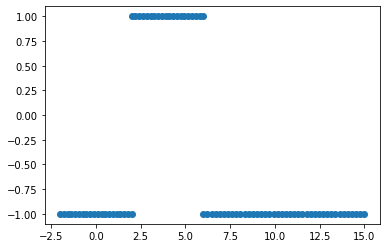

In [1415]:
plt.scatter(data.x, data.y)

In [1416]:
model4 = PoliLogRegression(pw=2)

In [1417]:
a, b = model4.fit(np.array(data.x).reshape(-1, 1), np.array(data.y).reshape(-1, 1), it=1000)

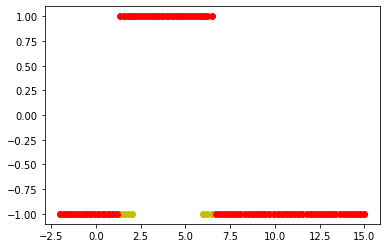

In [1418]:
plt.scatter(np.array(data.x).reshape(-1, 1), np.array(data.y).reshape(-1, 1), c='y')
plt.scatter(np.array(data.x).reshape(-1, 1), model4.predict(np.array(data.x).reshape(-1, 1)), c='r')

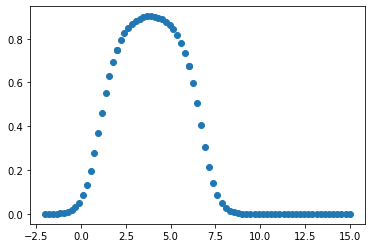

In [1419]:
plt.scatter(np.array(data.x).reshape(-1, 1), model4.predict_proba())